In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from apyori import apriori

import plotly.express as px
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
import seaborn as sns
py.init_notebook_mode(connected=True)#visualization

In [15]:
tx_data = pd.read_excel("C:\\Users\\murat.cukur\\Desktop\\apriori_basket_analyses.xlsx")

In [16]:
tx_data.head()

,Receipt No,Item
0,22.887878,Toothbrush
1,14.356449,Toothbrush
2,14.447840,Cacao Powder
3,24.096744,Cereals
4,99.911576,Chocalate


In [19]:
count=tx_data.groupby(['Receipt No'])['Item'].count().reset_index()

In [21]:
more_than_1=count[count['Item']>1]

In [23]:
list_receipt=more_than_1['Receipt No'].tolist()

In [28]:
df_result=tx_data[tx_data['Receipt No'].isin(list_receipt)]

In [29]:
df_result

,Receipt No,Item
4,9.991158e+01,Chocalate
5,9.991158e+01,Toilet Paper
6,9.991158e+01,Baby Diaper
18,1.169217e+02,Eggs
19,1.169217e+02,Cheese
...,...,...
582631,6.163443e+09,Toothbrush
582632,6.163443e+09,Nuts
582633,6.163443e+09,Chocalate
582634,6.163443e+09,Coffee & Tea


In [37]:
df_result=df_result.drop_duplicates(["Receipt No", "Item"])

In [38]:
df_result_last=df_result.groupby('Receipt No')['Item'].apply(list).reset_index(name='Basket')

In [39]:
df_result_last

,Receipt No,Basket
0,2.400722e+00,"[Coffee & Tea, Detergent, Toothbrush]"
1,2.401236e+00,"[Milk, Bread, Cereals, Fruit]"
2,2.407938e+00,"[Eggs, Toothbrush]"
3,2.411961e+00,"[Milk, Cheese, Bread]"
4,2.411975e+00,"[Milk, Cheese, Bread]"
...,...,...
27572,1.053373e+10,"[Cheese, Eggs, Iced Cream, Toilet Paper, Chips..."
27573,1.053373e+10,"[Olive Oil, Chocalate, Milk, Beverages, Iced C..."
27574,1.053373e+10,"[Chocalate, Beverages, Fruit, Detergent, Toile..."
27575,1.053373e+10,"[Beverages, Chips, Chocalate, Cheese, Nuts, To..."


In [40]:
basket_result=df_result_last['Basket'].values.tolist()

In [42]:
rules_result=apriori(basket_result,min_support=0.0001, min_confidence=0.2 , min_lift=1, max_length=2)

In [43]:
arr_result=list(rules_result)

In [44]:
arr_result

[RelationRecord(items=frozenset({'Beverages'}), support=0.31714834826123217, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Beverages'}), confidence=0.31714834826123217, lift=1.0)]),
 RelationRecord(items=frozenset({'Cheese'}), support=0.4059904993291511, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cheese'}), confidence=0.4059904993291511, lift=1.0)]),
 RelationRecord(items=frozenset({'Chocalate'}), support=0.46828879138412444, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Chocalate'}), confidence=0.46828879138412444, lift=1.0)]),
 RelationRecord(items=frozenset({'Beverages', 'Baby Diaper'}), support=0.029771186133372013, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Baby Diaper'}), items_add=frozenset({'Beverages'}), confidence=0.5229299363057325, lift=1.6488496288021022)]),
 RelationRecord(items=frozenset({'Baby Diaper', 'Bread'}), support=0.024114298147006562

In [45]:
dff_result = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

In [46]:
Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

In [47]:
for RelationRecord in arr_result:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

In [48]:
dff_result['Items'] = list(map(set, Items))
dff_result['Antecedent'] = list(map(set, Antecedent))
dff_result['Consequent'] = list(map(set, Consequent))
dff_result['Support'] = Support
dff_result['Confidence'] = Confidence
dff_result['Lift']= Lift

In [49]:
dff_result.sort_values(by='Confidence',ascending=False).head(40)

,Items,Antecedent,Consequent,Support,Confidence,Lift
155,"{Cereals, Cheese}",{Cereals},{Cheese},0.071726,0.694522,1.710687
198,"{Olive Oil, Cheese}",{Olive Oil},{Cheese},0.039888,0.690088,1.699763
253,"{Chocalate, Iced Cream}",{Iced Cream},{Chocalate},0.032310,0.685912,1.464721
191,"{Frozen potatoes, Cheese}",{Frozen potatoes},{Cheese},0.046561,0.670496,1.651507
228,"{Chocalate, Chips}",{Chips},{Chocalate},0.114878,0.664569,1.419143
13,"{Baby Diaper, Chocalate}",{Baby Diaper},{Chocalate},0.036480,0.640764,1.368310
190,"{Eggs, Cheese}",{Eggs},{Cheese},0.069986,0.626623,1.543443
256,"{Chocalate, Nuts}",{Nuts},{Chocalate},0.073938,0.625652,1.336039
194,"{Iced Cream, Cheese}",{Iced Cream},{Cheese},0.029409,0.624326,1.537786
250,"{Chocalate, Cigaret}",{Cigaret},{Chocalate},0.032346,0.622905,1.330173


In [50]:
dff_result['Antecedent']=dff_result['Antecedent'].astype(str).str.lstrip('{').str.rstrip('}')
dff_result['Antecedent']=dff_result['Antecedent'].astype(str).str.lstrip('"').str.rstrip('"')
dff_result['Antecedent']=dff_result['Antecedent'].astype(str).str.lstrip("'").str.rstrip("'")
dff_result['Consequent']=dff_result['Consequent'].astype(str).str.lstrip('{').str.rstrip('}')
dff_result['Consequent']=dff_result['Consequent'].astype(str).str.lstrip('"').str.rstrip('"')
dff_result['Consequent']=dff_result['Consequent'].astype(str).str.lstrip("'").str.rstrip("'")

In [53]:
dff_result_list=dff_result[['Antecedent','Consequent','Support','Confidence','Lift']]

In [54]:
dff_result_last=dff_result_list[(dff_result_list['Support']>=0.06) & (dff_result_list['Confidence'] >=0.5)].sort_values(by='Confidence',ascending=False).head(40)

In [56]:
dff_result_last_2 = dff_result_last.drop_duplicates('Support')

In [57]:
dff_result_last_2

,Antecedent,Consequent,Support,Confidence,Lift
155,Cereals,Cheese,0.071726,0.694522,1.710687
228,Chips,Chocalate,0.114878,0.664569,1.419143
190,Eggs,Cheese,0.069986,0.626623,1.543443
256,Nuts,Chocalate,0.073938,0.625652,1.336039
251,Coffee & Tea,Chocalate,0.086957,0.603878,1.289542
199,Spagetti,Cheese,0.073467,0.574263,1.414474
125,Canned Food,Cheese,0.087102,0.561215,1.382335
93,Cacao Powder,Cheese,0.077746,0.554435,1.365635
41,Beverages,Chocalate,0.172100,0.542648,1.158789
255,Milk,Chocalate,0.097509,0.533426,1.139096


In [80]:
dff_result_last_warmmap=dff_result_last_2[['Antecedent','Consequent','Confidence']]
dff_result_last_warmmap_2=dff_result_last_warmmap.copy()
dff_result_last_warmmap_2 = dff_result_last_warmmap_2[['Consequent', 'Antecedent', 'Confidence']]
dff_result_last_warmmap_2.columns=['Antecedent','Consequent','Confidence']
frames = [dff_result_last_warmmap, dff_result_last_warmmap_2]
dff_result_last_warmmap_3 = pd.concat(frames)
dff_result_last_warmmap_3=dff_result_last_warmmap_3.dropna()
dff_result_last_warmmap_3

,Antecedent,Consequent,Confidence
155,Cereals,Cheese,0.694522
228,Chips,Chocalate,0.664569
190,Eggs,Cheese,0.626623
256,Nuts,Chocalate,0.625652
251,Coffee & Tea,Chocalate,0.603878
199,Spagetti,Cheese,0.574263
125,Canned Food,Cheese,0.561215
93,Cacao Powder,Cheese,0.554435
41,Beverages,Chocalate,0.542648
255,Milk,Chocalate,0.533426


In [81]:
summary = dff_result_last_warmmap_3.set_index(['Antecedent', 'Consequent']).unstack().fillna(0)
#convert to array
corr_array  = np.array(summary)
matrix_cols = summary.columns.tolist()
matrix_cols_=pd.DataFrame(data=matrix_cols)  
matrix_cols_=matrix_cols_[[1]]
matrix_cols_=matrix_cols_.to_numpy()
matrix_cols_=matrix_cols_.tolist()
flat_list = []
for sublist in matrix_cols_:
    for item in sublist:
        flat_list.append(item)

In [82]:
flat_list

['Beverages',
 'Bread',
 'Cacao Powder',
 'Canned Food',
 'Cereals',
 'Cheese',
 'Chicken & Meat',
 'Chips',
 'Chocalate',
 'Coffee & Tea',
 'Eggs',
 'Milk',
 'Nuts',
 'Spagetti',
 'Toilet Paper']

In [85]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = flat_list,
                   y = flat_list,
                   colorscale = "rainbow",
                   colorbar   = dict(title = "Confidence value",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Basket Analysis with Apriori Algorithm",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)

In [86]:
py.iplot(fig)

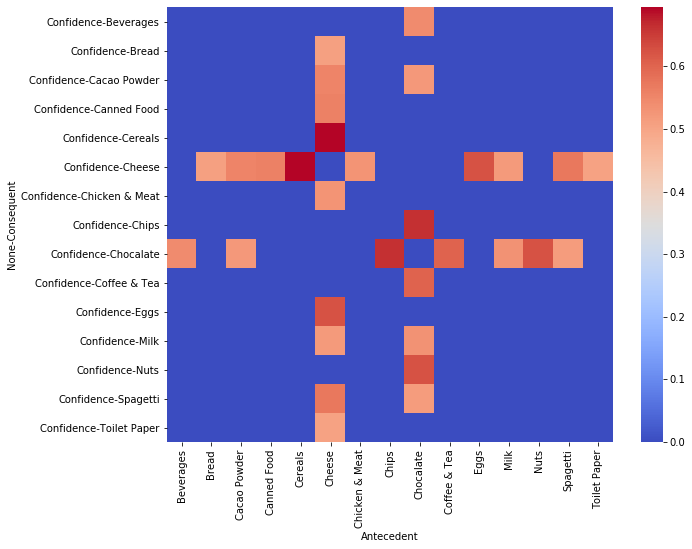

In [89]:
plt.figure(figsize=(10, 8))
# plot heatmap
ax = sns.heatmap(summary.T,cmap="coolwarm")